# Análisis de constantes de filtrado


En esta notebook, haremos un análisis de las constantes para filtrar palabras y usuarios. En el trabajo original utilizamos 40 ocurrencias y 5 usuarios para filtrar, pero puede que no sea el mejor para este nuevo dataset.





In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../output/listado_personas.csv", index_col=0)

print("Total de palabras: {}".format(df.shape[0]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Total de palabras: 85701


Agrego la serie de puntos de la suma acumulada de frecuencias

In [8]:
occ_columns = [c for c in df.columns if "ocurrencias" in c]

X = -np.sort(-df[occ_columns].values)

cumsum = (X / X.sum(axis=1).reshape(-1, 1)).cumsum(axis=1)


cs = pd.DataFrame(cumsum, columns=range(1, 24))
cs["palabra"] = df.index
cs.set_index("palabra", inplace=True)


extended_df = pd.concat([df, cs], axis=1)

Ahora, veamos lo siguiente: para las primeras 1000, 2000, 3000, y 5000 palabras ¿cuál es la media de la frecuencia relativa acumulada usando las $i$ provincias con mayor masa?

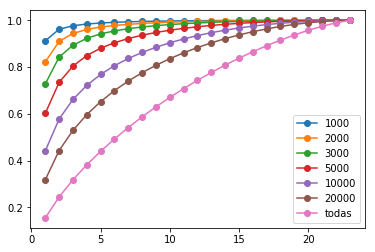

In [13]:
values = {}
for limit in [1000, 2000, 3000, 5000, 10000, 20000]:
    values[limit] = extended_df[:limit][list(range(1,24))].mean()
    
values["todas"] = extended_df[list(range(1,24))].mean()
pd.DataFrame(values).plot(marker='o')

Como región, elijamos las palabras que reúnen el 80% del uso de cada palabra.

In [49]:
def region(word_series):
    palabra = word_series[occ_columns]
    palabra = palabra / palabra.sum()
    accum = 0
    provs = []
    
    for prov in palabra.sort_values(ascending=False).index:
        accum+= palabra[prov]
        provs.append(prov)
        if accum >= 0.95:
            break

    return [p.replace("_ocurrencias", "") for p in provs]

region(df.loc["anga"])

['corrientes', 'formosa', 'chaco', 'misiones']

In [53]:
df[:100].apply(region, axis=1)

palabra
chivil                             [buenosaires]
ush                             [tierradelfuego]
poec                                   [neuquen]
malpegue                               [mendoza]
aijue                                  [formosa]
tolhuin                         [tierradelfuego]
vallerga                           [buenosaires]
yarca                                  [sanjuan]
blv                       [sanluis, buenosaires]
portho                                 [sanjuan]
jumeal                               [catamarca]
sinf                                   [tucuman]
plottier                               [neuquen]
kraka                                 [rionegro]
fsa               [formosa, corrientes, santafe]
bombola                                [formosa]
yarco                                  [sanjuan]
sanagasta                              [larioja]
wika                                 [catamarca]
obera                                 [misiones]
breñas      